In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gym_microrts import microrts_ai
from gym_microrts.envs.vec_env import MicroRTSGridModeVecEnv

from llm.nashor import Nashor

from gus.utils import save_video


# Game Lifecycle

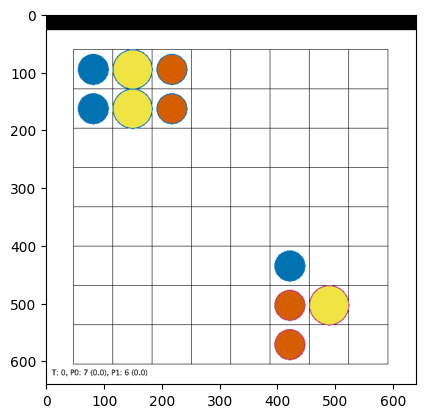

In [3]:
map_size = 8
no_action = np.zeros((1, map_size*map_size, 78))

envs = MicroRTSGridModeVecEnv(
    num_selfplay_envs=0,
    num_bot_envs=1,
    max_steps=2000,
    render_theme=2,
    ai2s=[microrts_ai.passiveAI for _ in range(1)],
    # ai2s=[microrts_ai.randomAI for _ in range(1)],
    # ai2s=[microrts_ai.naiveMCTSAI for _ in range(1)],
    # ai2s=[microrts_ai.coacAI for _ in range(1)],
    # map_paths=["maps/4x4/base4x4.xml"],
    #map_paths=["maps/8x8/basesWorkers8x8.xml"],
    map_paths=["maps/8x8/melee8x8Mixed7.xml"],
    reward_weight=np.array([10.0, 1.0, 1.0, 0.2, 1.0, 4.0]),
)
response = envs.reset()
action_mask = envs.get_action_mask()
img = envs.render(mode='rgb_array')
plt.imshow(img)

nashor = Nashor(map_size=map_size)

In [4]:
images = []
action = no_action
for i in range(2000):

    if i%20 == 0 and i != 0:
        print(f"{i = }")
        action_mask = envs.get_action_mask()
        action = nashor.get_action(action_mask, response[0])
        #import pdb; pdb.set_trace()
        
    response = envs.step(action)

    img = envs.render(mode='rgb_array')
    images.append(img)    

    if response[2][0]:
        print("done")
        break

save_video(images, path='experiment_list_version2_1.mp4')

--------------------------------------------------------------------------------
i = 20
--------------------------------------------------------------------------------
i = 40
--------------------------------------------------------------------------------
i = 60
--------------------------------------------------------------------------------
i = 80
--------------------------------------------------------------------------------
i = 100
--------------------------------------------------------------------------------
i = 120
--------------------------------------------------------------------------------
i = 140
--------------------------------------------------------------------------------
i = 160
--------------------------------------------------------------------------------
i = 180
--------------------------------------------------------------------------------
i = 200
--------------------------------------------------------------------------------
i = 220
-------------------------

In [5]:
%pdb

Automatic pdb calling has been turned ON


In [6]:
response[0]

array([[[[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]],

        [[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]],

        [[1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]],

        ...,

        [[1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 1, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]],

        [[1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
    